## Model F: EIS Gaussian Process Regression: With EIS Data from Paper # 23
#### Including SOC & Temp as Input
#### K-Fold Implementation segregated by Cell Number
EIS GPR v6.20

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the Data

In [41]:
# Extract the .csv file from its location
WholeDataRealSOH = pd.read_csv("G:\\My Drive\\Faris' Work\\KAIST\\NICE Lab\\Battery Data\\5Ah LG Cells Dataset - Paper 23\\WholeDataRealSOH csv.csv") 

# Display part of the data
WholeDataRealSOH.head(5)

,Cell_Name,SoH,SoH_Actual,Temp,SoC,Unnamed: 5,Fx10000,Fx7943,Fx6310,Fx5012,...,Unnamed: 179,Unnamed: 180,Unnamed: 181,HF3_1.4A,HF3_1.2A,HF3_1.0A,HF3_0.8A,HF3_0.6A,HF3_0.4A,HF3_0.3A
0,2,95,95.05,15,5,NaN,0.02995,0.02827,0.02704,0.02599,...,NaN,NaN,NaN,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128
1,2,95,95.05,15,20,NaN,0.03001,0.02843,0.02716,0.02606,...,NaN,NaN,NaN,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128
2,2,95,95.05,15,50,NaN,0.02965,0.02803,0.02671,0.02562,...,NaN,NaN,NaN,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128
3,2,95,95.05,15,70,NaN,0.02960,0.02800,0.02668,0.02549,...,NaN,NaN,NaN,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128
4,2,95,95.05,15,95,NaN,0.02958,0.02797,0.02667,0.02556,...,NaN,NaN,NaN,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128


#### Selecting specific features
Using All 61 Frequency Points

In [42]:
# Selecting All 61 Frequency Points (10kHz ~ 0.01Hz)
FP61 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95','Fx15.85','Fx12.59',
        'Fx10','Fx7.943','Fx6.31','Fx5.012','Fx3.981','Fx3.162','Fx2.512','Fx1.995','Fx1.585','Fx1.259',
        'Fx1','Fx0.7943','Fx0.631','Fx0.5012','Fx0.3981','Fx0.3162','Fx0.2512','Fx0.1995','Fx0.1585','Fx0.1259',
        'Fx0.1','Fx0.07943','Fx0.0631','Fx0.05012','Fx0.03981','Fx0.03162','Fx0.02512','Fx0.01995','Fx0.01585','Fx0.01259','Fx0.01',
        'Fy10000','Fy7943','Fy6310','Fy5012','Fy3981','Fy3162','Fy2512','Fy1995','Fy1585','Fy1259',
        'Fy1000','Fy794.3','Fy631','Fy501.2','Fy398.1','Fy316.2','Fy251.2','Fy199.5','Fy158.5','Fy125.9',
        'Fy100','Fy79.43','Fy63.1','Fy52','Fy39.81','Fy31.62','Fy25.12','Fy19.95','Fy15.85','Fy12.59',
        'Fy10','Fy7.943','Fy6.31','Fy5.012','Fy3.981','Fy3.162','Fy2.512','Fy1.995','Fy1.585','Fy1.259',
        'Fy1','Fy0.7943','Fy0.631','Fy0.5012','Fy0.3981','Fy0.3162','Fy0.2512','Fy0.1995','Fy0.1585','Fy0.1259',
        'Fy0.1','Fy0.07943','Fy0.0631','Fy0.05012','Fy0.03981','Fy0.03162','Fy0.02512','Fy0.01995','Fy0.01585','Fy0.01259','Fy0.01']

# Selecting 51 High Frequency Points (10kHz ~ 0.1Hz)
FP51 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95','Fx15.85','Fx12.59',
        'Fx10','Fx7.943','Fx6.31','Fx5.012','Fx3.981','Fx3.162','Fx2.512','Fx1.995','Fx1.585','Fx1.259',
        'Fx1','Fx0.7943','Fx0.631','Fx0.5012','Fx0.3981','Fx0.3162','Fx0.2512','Fx0.1995','Fx0.1585','Fx0.1259',
        'Fx0.1',
        'Fy10000','Fy7943','Fy6310','Fy5012','Fy3981','Fy3162','Fy2512','Fy1995','Fy1585','Fy1259',
        'Fy1000','Fy794.3','Fy631','Fy501.2','Fy398.1','Fy316.2','Fy251.2','Fy199.5','Fy158.5','Fy125.9',
        'Fy100','Fy79.43','Fy63.1','Fy52','Fy39.81','Fy31.62','Fy25.12','Fy19.95','Fy15.85','Fy12.59',
        'Fy10','Fy7.943','Fy6.31','Fy5.012','Fy3.981','Fy3.162','Fy2.512','Fy1.995','Fy1.585','Fy1.259',
        'Fy1','Fy0.7943','Fy0.631','Fy0.5012','Fy0.3981','Fy0.3162','Fy0.2512','Fy0.1995','Fy0.1585','Fy0.1259',
        'Fy0.1']

# Selecting 51 High Frequency Points (10kHz ~ 0.3Hz)
FP46 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95','Fx15.85','Fx12.59',
        'Fx10','Fx7.943','Fx6.31','Fx5.012','Fx3.981','Fx3.162','Fx2.512','Fx1.995','Fx1.585','Fx1.259',
        'Fx1','Fx0.7943','Fx0.631','Fx0.5012','Fx0.3981','Fx0.3162',
        'Fy10000','Fy7943','Fy6310','Fy5012','Fy3981','Fy3162','Fy2512','Fy1995','Fy1585','Fy1259',
        'Fy1000','Fy794.3','Fy631','Fy501.2','Fy398.1','Fy316.2','Fy251.2','Fy199.5','Fy158.5','Fy125.9',
        'Fy100','Fy79.43','Fy63.1','Fy52','Fy39.81','Fy31.62','Fy25.12','Fy19.95','Fy15.85','Fy12.59',
        'Fy10','Fy7.943','Fy6.31','Fy5.012','Fy3.981','Fy3.162','Fy2.512','Fy1.995','Fy1.585','Fy1.259',
        'Fy1','Fy0.7943','Fy0.631','Fy0.5012','Fy0.3981','Fy0.3162']

# Selecting 41 High Frequency Points (10kHz ~ 1Hz)
FP41 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95','Fx15.85','Fx12.59',
        'Fx10','Fx7.943','Fx6.31','Fx5.012','Fx3.981','Fx3.162','Fx2.512','Fx1.995','Fx1.585','Fx1.259',
        'Fx1',
        'Fy10000','Fy7943','Fy6310','Fy5012','Fy3981','Fy3162','Fy2512','Fy1995','Fy1585','Fy1259',
        'Fy1000','Fy794.3','Fy631','Fy501.2','Fy398.1','Fy316.2','Fy251.2','Fy199.5','Fy158.5','Fy125.9',
        'Fy100','Fy79.43','Fy63.1','Fy52','Fy39.81','Fy31.62','Fy25.12','Fy19.95','Fy15.85','Fy12.59',
        'Fy10','Fy7.943','Fy6.31','Fy5.012','Fy3.981','Fy3.162','Fy2.512','Fy1.995','Fy1.585','Fy1.259',
        'Fy1']

# Selecting 41 High Frequency Points (10kHz ~ 2Hz)
FP38 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95','Fx15.85','Fx12.59',
        'Fx10','Fx7.943','Fx6.31','Fx5.012','Fx3.981','Fx3.162','Fx2.512','Fx1.995',
        'Fy10000','Fy7943','Fy6310','Fy5012','Fy3981','Fy3162','Fy2512','Fy1995','Fy1585','Fy1259',
        'Fy1000','Fy794.3','Fy631','Fy501.2','Fy398.1','Fy316.2','Fy251.2','Fy199.5','Fy158.5','Fy125.9',
        'Fy100','Fy79.43','Fy63.1','Fy52','Fy39.81','Fy31.62','Fy25.12','Fy19.95','Fy15.85','Fy12.59',
        'Fy10','Fy7.943','Fy6.31','Fy5.012','Fy3.981','Fy3.162','Fy2.512','Fy1.995']

# Selecting 34 High Frequency Points (10kHz ~ 5Hz)
FP34 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95','Fx15.85','Fx12.59',
        'Fx10','Fx7.943','Fx6.31','Fx5.012',
        'Fy10000','Fy7943','Fy6310','Fy5012','Fy3981','Fy3162','Fy2512','Fy1995','Fy1585','Fy1259',
        'Fy1000','Fy794.3','Fy631','Fy501.2','Fy398.1','Fy316.2','Fy251.2','Fy199.5','Fy158.5','Fy125.9',
        'Fy100','Fy79.43','Fy63.1','Fy52','Fy39.81','Fy31.62','Fy25.12','Fy19.95','Fy15.85','Fy12.59',
        'Fy10','Fy7.943','Fy6.31','Fy5.012']

# Selecting 31 High Frequency Points (10kHz ~ 10Hz)
FP31 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95','Fx15.85','Fx12.59',
        'Fx10',
        'Fy10000','Fy7943','Fy6310','Fy5012','Fy3981','Fy3162','Fy2512','Fy1995','Fy1585','Fy1259',
        'Fy1000','Fy794.3','Fy631','Fy501.2','Fy398.1','Fy316.2','Fy251.2','Fy199.5','Fy158.5','Fy125.9',
        'Fy100','Fy79.43','Fy63.1','Fy52','Fy39.81','Fy31.62','Fy25.12','Fy19.95','Fy15.85','Fy12.59',
        'Fy10']

# Selecting 28 High Frequency Points (10kHz ~ 20Hz)
FP28 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95',
        'Fy10000','Fy7943','Fy6310','Fy5012','Fy3981','Fy3162','Fy2512','Fy1995','Fy1585','Fy1259',
        'Fy1000','Fy794.3','Fy631','Fy501.2','Fy398.1','Fy316.2','Fy251.2','Fy199.5','Fy158.5','Fy125.9',
        'Fy100','Fy79.43','Fy63.1','Fy52','Fy39.81','Fy31.62','Fy25.12','Fy19.95']

# Selecting 24 High Frequency Points (10kHz ~ 50Hz)
FP24 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52',
        'Fy10000','Fy7943','Fy6310','Fy5012','Fy3981','Fy3162','Fy2512','Fy1995','Fy1585','Fy1259',
        'Fy1000','Fy794.3','Fy631','Fy501.2','Fy398.1','Fy316.2','Fy251.2','Fy199.5','Fy158.5','Fy125.9',
        'Fy100','Fy79.43','Fy63.1','Fy52']

# Selecting 7 best Frequency Points
FP7 = ['Fx_1','Fx_2','Fx_3','Fx_4','Fx_5','Fx_6','Fx_7','Fy_1','Fy_2','Fy_3','Fy_4','Fy_5','Fy_6','Fy_7']

# Selecting Custom Frequency Ranges: (x: 10kHz ~ 100Hz) (y: 1Hz ~ 0.01Hz)
FPc = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95','Fx15.85','Fx12.59',
        'Fx10',
        'Fy1','Fy0.7943','Fy0.631','Fy0.5012','Fy0.3981','Fy0.3162','Fy0.2512','Fy0.1995','Fy0.1585','Fy0.1259',
        'Fy0.1','Fy0.07943','Fy0.0631','Fy0.05012','Fy0.03981','Fy0.03162','Fy0.02512','Fy0.01995','Fy0.01585','Fy0.01259','Fy0.01']

# Selecting Custom Frequency Ranges (x: 10kHz ~ 100Hz)
FPc1 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95','Fx15.85','Fx12.59',
        'Fx10']

# Selecting Custom Frequency Ranges (x: 10kHz ~ 1kHz)
FPc2 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000']

# Selecting Custom Frequency Ranges (x: 10kHz ~ 100Hz) (y: 10kHz ~ 1kHz)
FPc3 = ['Fx10000','Fx7943','Fx6310','Fx5012','Fx3981','Fx3162','Fx2512','Fx1995','Fx1585','Fx1259',
        'Fx1000','Fx794.3','Fx631','Fx501.2','Fx398.1','Fx316.2','Fx251.2','Fx199.5','Fx158.5','Fx125.9',
        'Fx100','Fx79.43','Fx63.1','Fx52','Fx39.81','Fx31.62','Fx25.12','Fx19.95','Fx15.85','Fx12.59',
        'Fx10',
        'Fy10000','Fy7943','Fy6310','Fy5012','Fy3981','Fy3162','Fy2512','Fy1995','Fy1585','Fy1259',
        'Fy1000']

# ALL Health Features
HF1 = ['HF1_4.0V','HF1_3.9V','HF1_3.8V','HF1_3.7V','HF1_3.6V','HF1_3.5V','HF1_3.4V']
HF2 = ['HF2_250s','HF2_500s','HF2_750s','HF2_1000s','HF2_1250s','HF2_1500s','HF2_1750s','HF2_2000s']
HF3 = ['HF3_1.4A','HF3_1.2A','HF3_1.0A','HF3_0.8A','HF3_0.6A','HF3_0.4A','HF3_0.3A']

# Choose the Frequency Points
FP = FP34
FPx = [value for value in FP if value.startswith('Fx')]
FPy = [value for value in FP if value.startswith('Fy')]

# Select the specific columns needed for Implementation - Cell#, SoH, Temp, SoC, frequency points (x & y)
sfp = WholeDataRealSOH[['Cell_Name','SoH_Actual','Temp','SoC'] + FP + HF1 + HF2 + HF3]

# Display part of the data
sfp.head(3)

,Cell_Name,SoH_Actual,Temp,SoC,Fx10000,Fx7943,Fx6310,Fx5012,Fx3981,Fx3162,...,HF2_1500s,HF2_1750s,HF2_2000s,HF3_1.4A,HF3_1.2A,HF3_1.0A,HF3_0.8A,HF3_0.6A,HF3_0.4A,HF3_0.3A
0,2,95.05,15,5,0.02995,0.02827,0.02704,0.02599,0.02499,0.02480,...,0.56494,0.43828,0.33776,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128
1,2,95.05,15,20,0.03001,0.02843,0.02716,0.02606,0.02506,0.02487,...,0.56494,0.43828,0.33776,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128
2,2,95.05,15,50,0.02965,0.02803,0.02671,0.02562,0.02464,0.02443,...,0.56494,0.43828,0.33776,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128


#### Creating Training Samples:
All Cells (except test cells)

In [43]:
# Creating training data (Training & Test data will use different cells)
train = [None] * 5
train[0] = (sfp['Cell_Name'] != 28) & (sfp['Cell_Name'] != 2) & (sfp['Cell_Name'] != 12) & (sfp['Cell_Name'] != 19) & (sfp['Cell_Name'] != 15)
train[1] = (sfp['Cell_Name'] != 29) & (sfp['Cell_Name'] != 3) & (sfp['Cell_Name'] != 23) & (sfp['Cell_Name'] != 20) & (sfp['Cell_Name'] != 17)
train[2] = (sfp['Cell_Name'] != 30) & (sfp['Cell_Name'] != 4) & (sfp['Cell_Name'] != 14) & (sfp['Cell_Name'] != 21) & (sfp['Cell_Name'] != 18)
train[3] = (sfp['Cell_Name'] != 32) & (sfp['Cell_Name'] != 5) & (sfp['Cell_Name'] != 23) & (sfp['Cell_Name'] != 25) & (sfp['Cell_Name'] != 22)
# train[4] = (sfp['Cell_Name'] != 31) & (sfp['Cell_Name'] != 6) & (sfp['Cell_Name'] != 13) & (sfp['Cell_Name'] != 26) & (sfp['Cell_Name'] != 24)
train[4] = (sfp['Cell_Name'] != 31) & (sfp['Cell_Name'] != 6) & (sfp['Cell_Name'] != 13) & (sfp['Cell_Name'] != 24)    # No 26

sfp_train = sfp[train[0]]
sfp_train.head(3)

,Cell_Name,SoH_Actual,Temp,SoC,Fx10000,Fx7943,Fx6310,Fx5012,Fx3981,Fx3162,...,HF2_1500s,HF2_1750s,HF2_2000s,HF3_1.4A,HF3_1.2A,HF3_1.0A,HF3_0.8A,HF3_0.6A,HF3_0.4A,HF3_0.3A
15,3,96.21,15,5,0.02958,0.02802,0.02667,0.02565,0.02467,0.02447,...,0.87038,0.75509,0.63827,0.000918,0.000375,0.000224,0.000163,0.00013,0.000105,0.000094
16,3,96.21,15,20,0.02939,0.02783,0.02652,0.02546,0.02445,0.02425,...,0.87038,0.75509,0.63827,0.000918,0.000375,0.000224,0.000163,0.00013,0.000105,0.000094
17,3,96.21,15,50,0.02928,0.02767,0.02640,0.02531,0.02431,0.02410,...,0.87038,0.75509,0.63827,0.000918,0.000375,0.000224,0.000163,0.00013,0.000105,0.000094


#### Creating Test Samples:

In [44]:
# Creating Test Data (All Test sets have complete SOH ranges)
test = [None] * 5
test[0] = (sfp['Cell_Name'] == 28) | (sfp['Cell_Name'] == 2) | (sfp['Cell_Name'] == 12) | (sfp['Cell_Name'] == 19) | (sfp['Cell_Name'] == 15)
test[1] = (sfp['Cell_Name'] == 29) | (sfp['Cell_Name'] == 3) | (sfp['Cell_Name'] == 23) | (sfp['Cell_Name'] == 20) | (sfp['Cell_Name'] == 17)
test[2] = (sfp['Cell_Name'] == 30) | (sfp['Cell_Name'] == 4) | (sfp['Cell_Name'] == 14) | (sfp['Cell_Name'] == 21) | (sfp['Cell_Name'] == 18)
test[3] = (sfp['Cell_Name'] == 32) | (sfp['Cell_Name'] == 5) | (sfp['Cell_Name'] == 23) | (sfp['Cell_Name'] == 25) | (sfp['Cell_Name'] == 22)
# test[4] = (sfp['Cell_Name'] == 31) | (sfp['Cell_Name'] == 6) | (sfp['Cell_Name'] == 13) | (sfp['Cell_Name'] == 26) | (sfp['Cell_Name'] == 24)
test[4] = (sfp['Cell_Name'] == 31) | (sfp['Cell_Name'] == 6) | (sfp['Cell_Name'] == 13) | (sfp['Cell_Name'] == 24)     # No 26

sfp_test = sfp[test[0]]
sfp_test.head(3)

,Cell_Name,SoH_Actual,Temp,SoC,Fx10000,Fx7943,Fx6310,Fx5012,Fx3981,Fx3162,...,HF2_1500s,HF2_1750s,HF2_2000s,HF3_1.4A,HF3_1.2A,HF3_1.0A,HF3_0.8A,HF3_0.6A,HF3_0.4A,HF3_0.3A
0,2,95.05,15,5,0.02995,0.02827,0.02704,0.02599,0.02499,0.02480,...,0.56494,0.43828,0.33776,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128
1,2,95.05,15,20,0.03001,0.02843,0.02716,0.02606,0.02506,0.02487,...,0.56494,0.43828,0.33776,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128
2,2,95.05,15,50,0.02965,0.02803,0.02671,0.02562,0.02464,0.02443,...,0.56494,0.43828,0.33776,0.00088,0.000467,0.000318,0.00024,0.000188,0.000147,0.000128


#### GPR Model Implementation

In [50]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern, ConstantKernel
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import time

# Initalizing arrays to store various Metrics
kernelHP = [None] * 5
MAE = [None] * 5
MSE = [None] * 5
RMSE = [None] * 5
R2Trn = [None] * 5
R2Test = [None] * 5
TrTime = [None] * 5
mean_prediction = [None] * 5
Error = [None] * 5

for i in range(len(test)):
    
    # Creating Training and Test Data
    sfp_train = sfp[train[i]]
    sfp_test = sfp[test[i]] 

    # Converting training samples to np arrays for GPR
    X_train = np.asanyarray(sfp_train[['Temp','SoC','HF1_4.0V'] + FP])
    Y_train = np.asanyarray(sfp_train[['SoH_Actual']])
    
    # Converting test samples to np arrays for GPR
    X_test = np.asanyarray(sfp_test[['Temp','SoC','HF1_4.0V'] + FP])
    Y_test = np.asanyarray(sfp_test[['SoH_Actual']])

    # Initial Values for Kernels
    gpr_input_size = X_train.shape[1]
    MlengthScale = [1.0] * gpr_input_size
    # MlengthScale = [55.4, 177, 1.61e+03, 0.141, 0.022, 1.04e+04, 4.72e+03, 478, 20.9, 0.00417, 2.01e+04, 3.51, 731, 1e+05, 4.02, 0.00616, 1.13e+03, 13.9, 6.65, 575, 0.497, 4.26e+03, 0.0114, 12.3, 4.28e+03, 1e+05, 5.25e+03, 5.73e+03, 1e+05, 647, 24.5, 322, 431, 0.0552, 7.51e+03, 503, 4.37e+04, 1.38e+04, 1.38e+04, 3.46e+04, 78.6, 49.2, 34.7, 1e+05, 108, 2.04e+03, 7.74e+03, 2.44e+04, 96.4, 2.48e+03, 78.2, 2.36e+04, 146, 953, 695, 145, 159, 102, 103, 1e+05, 228, 156, 9.54e+03, 645, 392, 288, 3.56e+04, 5.29e+03, 6.15e+04, 1e+05, 9.98e+04, 124, 1e+05, 43.4, 6.22e+04, 20.3, 1.34e+04, 22.4, 28.4, 767, 1.11e+03, 14.4, 1e+05, 0.041, 1e+05, 19.6, 1e+05, 4.44e+04, 0.0117, 0.00848, 15.5, 40.1, 1.43e+03, 774, 0.0226, 0.0174, 58.8, 0.102, 19.1, 2.78e+03, 487, 45.3, 2.8e+03, 43.3, 82.6, 10.3, 14.5, 1e+05, 92.8, 48.1, 1e+05, 21.9, 1e+05, 6.67e+04, 59, 72.5, 1e+05, 1e+05, 153, 8.88e+04, 195, 930, 0.0352, 15.6]
    MlengthScaleBounds = [(5e-2, 1e6)] * gpr_input_size           # Setting the Range directly adjusts the smoothnes of the prediction - Underfitting/Overfitting (Higher -> Underfit)
    # MlengthScaleBounds = "fixed"
    
    # Initiating Kernels and GPR
    Kernel = 10**2 * Matern(length_scale=MlengthScale, length_scale_bounds=MlengthScaleBounds, nu=2.5) + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-1, 1e1))
    gaussian_process = GaussianProcessRegressor(kernel=Kernel, n_restarts_optimizer=66)             #, random_state = 7 : 91

    # Training the data and optimizing hyperparameters
    start = time.time()
    gaussian_process.fit(X_train, Y_train)
    stop = time.time()

    # Predicting SoH from Test Data
    mean_prediction[i] = gaussian_process.predict(X_test, return_std=False)
    Error[i] = np.subtract(np.squeeze(Y_test), mean_prediction[i])

    # Saving various Metrics
    kernelHP[i] = gaussian_process.kernel_
    MAE[i] = mean_absolute_error(Y_test, mean_prediction[i])
    MSE[i] = mean_squared_error(Y_test, mean_prediction[i])
    RMSE[i] = root_mean_squared_error(Y_test, mean_prediction[i])
    
    R2Trn[i] = gaussian_process.score(X_train,Y_train)
    R2Test[i] = gaussian_process.score(X_test,Y_test)
    TrTime[i] = stop - start
    
    print("\n\n Training Time =", "%.0f" % TrTime[i], "sec")

c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 5 of parameter k1__k2__length_scale is close to the specified lower bound 0.05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 6 of parameter k1__k2__length_scale is close to the specified lower bound 0.05. Decreasing the bound and calling fit again may fin



 Training Time = 1427 sec


c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified lower bound 0.05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified lower bound 0.05. Decreasing the bound and calling fit again may fin



 Training Time = 1516 sec


c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified lower bound 0.05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified lower bound 0.05. Decreasing the bound and calling fit again may fin



 Training Time = 1280 sec


c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified lower bound 0.05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 4 of parameter k1__k2__length_scale is close to the specified lower bound 0.05. Decreasing the bound and calling fit again may fin



 Training Time = 1476 sec


 Training Time = 1671 sec


c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 5 of parameter k1__k2__length_scale is close to the specified lower bound 0.05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Ahmad Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 8 of parameter k1__k2__length_scale is close to the specified lower bound 0.05. Decreasing the bound and calling fit again may fin

#### GPR Results & Evaluation

In [49]:
from tabulate import tabulate

FPx_numbers = [value[2:] for value in FPx]              # Just to remove Fx from frequency
FPy_numbers = [value[2:] for value in FPy]              # Just to remove Fy from frequency

# Tunable Characteristics
print("Frequency Range:", FPx_numbers[0], "Hz ~", FPx_numbers[-1], "Hz")
print("Frequency Range:", FPy_numbers[0], "Hz ~", FPy_numbers[-1], "Hz")
print("Frequency Points:", "%.1d" % np.shape(FPx))
print("Length Scale Range:", MlengthScaleBounds[0])

# Calculating the Average Error Metrics
print("\nMAE =", "%.4f" % np.mean(MAE))
print("MSE =",  "%.4f" % np.mean(MSE))
print("RMSE =", "%.4f" % np.mean(RMSE))
print("\nR²(Test) =", "%.4f" % np.mean(R2Test))
print("Total Training Time =", "%.0f" % sum(TrTime), "sec")

# Creating Table for error Metrics for each Fold
print("\nError Metrics Table")
data = list(zip(["1", "2", "3", "4", "5"], MAE, RMSE, R2Test, R2Trn, TrTime))
# Define the headers
headers = ["Fold #","MAE", "RMSE", "R²", "R²(Tr)", "Tr Time"]
# Create and print the table
table = tabulate(data, headers, tablefmt="grid", floatfmt=".2f")
print(table)

# Printing the Optimized Hyperparameters for each Fold
print("\nOptimized kernel hyperparameters for each fold:")
for i in range(len(test)):
    print(kernelHP[i])

# Printing table for individual Prediction
for i in range(len(test)):
    print("\nFold",i+1)
    # Combine the arrays into rows
    data = list(zip(sfp[test[i]]['Cell_Name'],sfp[test[i]]['Temp'],sfp[test[i]]['SoC'],sfp[test[i]]['SoH_Actual'], mean_prediction[i], Error[i]) )
    # Define the headers
    headers = ["Cell#","Temp","SoC","True SoH", "Predicted SoH", "Error"]
    # Create and print the table
    table = tabulate(data, headers, tablefmt="grid", floatfmt=".2f")
    print(table)

Frequency Range: 10000 Hz ~ 5.012 Hz
Frequency Range: 10000 Hz ~ 5.012 Hz
Frequency Points: 34
Length Scale Range: (0.05, 1000000.0)

MAE = 5.9997
MSE = 48.4616
RMSE = 6.9545

R²(Test) = -0.0178
Total Training Time = 88 sec

Error Metrics Table
+----------+-------+--------+-------+----------+-----------+
|   Fold # |   MAE |   RMSE |    R² |   R²(Tr) |   Tr Time |
+==========+=======+========+=======+==========+===========+
|        1 |  5.66 |   6.61 | -0.00 |    -0.00 |     11.04 |
+----------+-------+--------+-------+----------+-----------+
|        2 |  6.24 |   7.19 | -0.00 |    -0.00 |     26.21 |
+----------+-------+--------+-------+----------+-----------+
|        3 |  6.29 |   7.20 | -0.00 |    -0.00 |     10.56 |
+----------+-------+--------+-------+----------+-----------+
|        4 |  5.39 |   6.54 | -0.01 |    -0.00 |     22.39 |
+----------+-------+--------+-------+----------+-----------+
|        5 |  6.41 |   7.23 | -0.08 |    -0.00 |     17.75 |
+----------+-------+---

#### Plotting the Results

KeyError: "None of [Index([               (True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, ...),\n       (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...),\n       (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...),\n       (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...),\n                 (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, ...)],\n      dtype='object')] are in the [columns]"

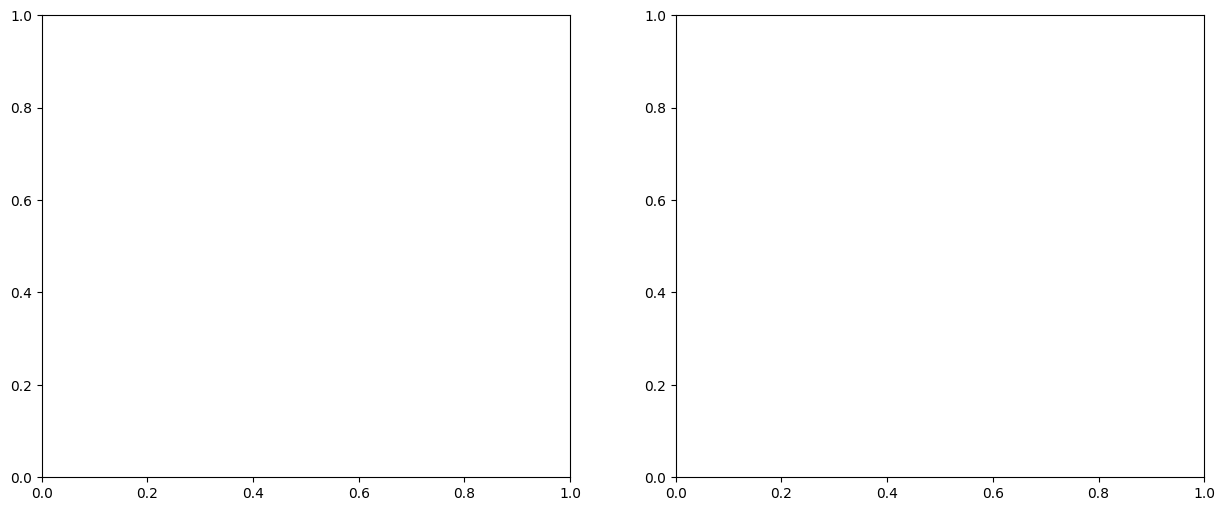

In [38]:
Testpoints = np.arange(1, 360+1)  # Test Points Numbering

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot (a): True SoH & Predicted SoH vs Test Points
ax1.plot(Testpoints, sfp[test]['Cell_Name'], 'bo', label='True SoH')
ax1.plot(Testpoints, mean_prediction, 'go', label='Predicted SoH')
ax1.set_xlabel('Test Points')
ax1.set_ylabel('SoH (%)')
ax1.legend()
ax1.grid(True)
ax1.set_title('True SoH & Predicted SoH vs Test Points')

# Subplot (b): True SoH vs Predicted SoH
ax2.plot(Y_test, mean_prediction, 'ro', label='Observation')
ax2.plot([80, 100], [80, 100], 'k-', label='Perfect Prediction')
ax2.set_xlabel('True SoH (%)')
ax2.set_ylabel('Predicted SoH (%)')
ax2.legend()
ax2.grid(True)
ax2.set_title('True SoH vs Predicted SoH')

# Show the plot
plt.tight_layout()
plt.show()

#### Plotting Seperate EIS Nyquist Plots

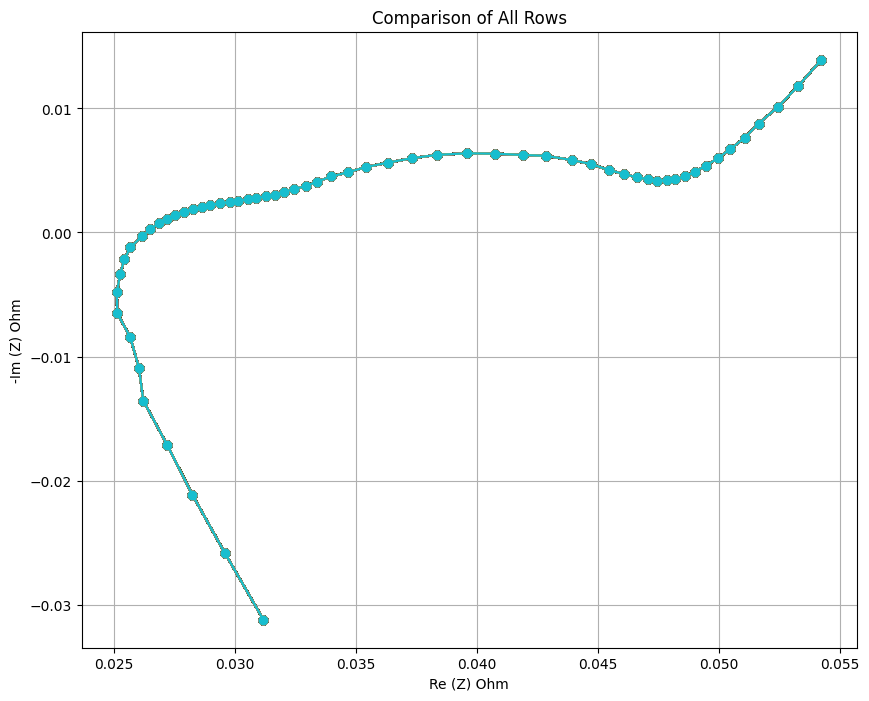

(360, 61)


In [9]:
FPa = FP61
FPax = [value for value in FPa if value.startswith('Fx')]
FPay = [value for value in FPa if value.startswith('Fy')]

X_Nyquist = np.asanyarray(sfp[FPax])
Y_Nyquist = np.asanyarray(sfp[FPay])

PlotNo = 210

plt.figure(figsize=(10, 8))
for i in range(sfp.shape[0]):
    plt.plot(X_Nyquist[PlotNo], (-1)*Y_Nyquist[PlotNo], marker='o', label=f'Row {i}')

plt.xlabel('Re (Z) Ohm')
plt.ylabel('-Im (Z) Ohm')
plt.title('Comparison of All Rows')
# plt.legend()
plt.grid(True)
plt.show()

print(np.shape(X_Nyquist))

### ---------------------End of Code---------------------

### ______________________________________________________________________